In [1]:
from __future__ import print_function

%matplotlib inline

<div style='color:#1C2227; background-color: #e64a4a; padding:30px; border-radius: 25px; text-align:center;'>

<h2 style='color:#1C2227;'> Recognizing hand-written digits</h2>

</div>

---

An example showing how the scikit-learn can be used to recognize images of
hand-written digits.



In [2]:
import sklearn

In [8]:
print(sklearn.__version__)
print(sklearn.__doc__)

0.18.1

Machine learning module for Python

sklearn is a Python module integrating classical machine
learning algorithms in the tightly-knit world of scientific Python
packages (numpy, scipy, matplotlib).

It aims to provide simple and efficient solutions to learning problems
that are accessible to everybody and reusable in various contexts:
machine-learning as a versatile tool for science and engineering.

See http://scikit-learn.org for complete documentation.



In [9]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

In [11]:
# The digits dataset
digits = datasets.load_digits()

In [30]:
len(digits.images)

1797

In [31]:
digits.images[10]

array([[  0.,   0.,   1.,   9.,  15.,  11.,   0.,   0.],
       [  0.,   0.,  11.,  16.,   8.,  14.,   6.,   0.],
       [  0.,   2.,  16.,  10.,   0.,   9.,   9.,   0.],
       [  0.,   1.,  16.,   4.,   0.,   8.,   8.,   0.],
       [  0.,   4.,  16.,   4.,   0.,   8.,   8.,   0.],
       [  0.,   1.,  16.,   5.,   1.,  11.,   3.,   0.],
       [  0.,   0.,  12.,  12.,  10.,  10.,   0.,   0.],
       [  0.,   0.,   1.,  10.,  13.,   3.,   0.,   0.]])

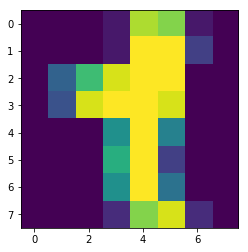

In [34]:
plt.imshow(digits.images[80])

In [37]:
digits.target[80]

1

In [36]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

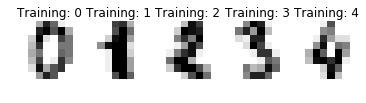

In [39]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [40]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [41]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

In [42]:
# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples / 2], digits.target[:n_samples / 2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
# Now predict the value of the digit on the second half:
expected = digits.target[n_samples / 2:]
predicted = classifier.predict(data[n_samples / 2:])

In [44]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))


Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  

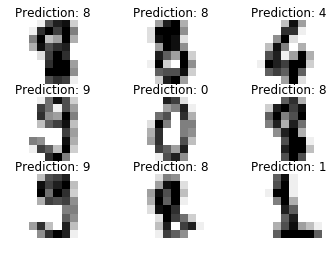

In [51]:
N_predictions = 9
images_and_predictions = list(zip(digits.images[n_samples / 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:N_predictions]):
    plt.subplot(3, 3, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)